In [ ]:
! pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 97.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import pylab as plt

import requests
import time

import requests
from bs4 import BeautifulSoup
import re
import fitz

from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/04-anika-shmanika.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
! pip install sentence-transformers umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvji

In [ ]:
topic_labels = [
    "privacy",
    "federated learning",
    "fairness",
    "adversarial",
    "continual learning",
    "meta learning",
    "neural architecture search",
    "few-shot learning",
    "knowledge distillation",
    "compression",
    "pruning",
    "CNNs",
    "optimization",
    "active learning",
    "transfer learning",
    "robustness",
    "semi-supervised learning",
    "clustering",
    "out-of-distribution",
    "GANs",
    "anomaly detection",
    "optimal transport",
    "causality",
    "time series",
    "multi-agent RL",
    "offline RL",
    "imitation learning",
    "model-based RL",
    "safety",
    "RL",
    "code generation",
    "alignment",
    "LLMs",
    "multi-task learning",
    "in-context learning",
    "explainability",
    "interpretability",
    "language models",
    "transformers",
    "RNNs",
    "ViTs",
    "object detection",
    "vision-language models",
    "self-supervised learning",
    "neuroscience",
    "autoencoders",
    "knowledge graphs",
    "diffusion models",
    "autonomous driving",
    "graphs"
]

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import normalize

model = SentenceTransformer("malteos/scincl")

label_embeds = model.encode(topic_labels)
label_embeds = normalize(label_embeds)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/205 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.77k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/327 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/227k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [ ]:
from tqdm import tqdm
import numpy as np

texts = (df['title'] + " [SEP] " + df['abstract']).fillna('').tolist()

paper_embeds = model.encode(texts, batch_size=64, show_progress_bar=True)
paper_embeds = normalize(paper_embeds)

# https://huggingface.co/malteos/scincl

Batches:   0%|          | 0/388 [00:00<?, ?it/s]

In [ ]:
df['tags_semantic'] = [[] for _ in range(len(df))]

for i, emb in enumerate(tqdm(paper_embeds, desc="Tagging papers")):
    sims = {label: float(np.dot(emb, label_emb)) for label, label_emb in zip(topic_labels, label_embeds)}
    top_labels = sorted(sims.items(), key=lambda x: x[1], reverse=True)[:5]
    pred_labels = [label for label, _ in top_labels]

    df.at[i, 'tags_semantic'] = pred_labels

    if i % 500 == 0:
        print(f"Paper {i}: {pred_labels}")

Tagging papers:   8%|▊         | 1938/24779 [00:00<00:02, 9684.25it/s]

Paper 0: ['CNNs', 'object detection', 'self-supervised learning', 'vision-language models', 'semi-supervised learning']
Paper 500: ['RNNs', 'CNNs', 'vision-language models', 'GANs', 'autoencoders']
Paper 1000: ['CNNs', 'GANs', 'autoencoders', 'RNNs', 'optimal transport']
Paper 1500: ['fairness', 'interpretability', 'RL', 'explainability', 'optimization']


Tagging papers:  16%|█▌        | 3880/24779 [00:00<00:02, 9685.07it/s]

Paper 2000: ['LLMs', 'out-of-distribution', 'federated learning', 'knowledge distillation', 'adversarial']
Paper 2500: ['imitation learning', 'offline RL', 'continual learning', 'optimization', 'transfer learning']
Paper 3000: ['optimization', 'pruning', 'offline RL', 'LLMs', 'meta learning']
Paper 3500: ['out-of-distribution', 'optimization', 'pruning', 'clustering', 'ViTs']


Tagging papers:  24%|██▎       | 5826/24779 [00:00<00:01, 9704.84it/s]

Paper 4000: ['time series', 'autoencoders', 'diffusion models', 'out-of-distribution', 'optimization']
Paper 4500: ['autoencoders', 'out-of-distribution', 'continual learning', 'optimization', 'transfer learning']
Paper 5000: ['meta learning', 'optimization', 'continual learning', 'LLMs', 'pruning']
Paper 5500: ['CNNs', 'LLMs', 'optimization', 'ViTs', 'transformers']


Tagging papers:  31%|███▏      | 7770/24779 [00:00<00:01, 9680.81it/s]

Paper 6000: ['clustering', 'LLMs', 'ViTs', 'self-supervised learning', 'alignment']
Paper 6500: ['LLMs', 'neuroscience', 'ViTs', 'autoencoders', 'RL']
Paper 7000: ['autoencoders', 'transfer learning', 'CNNs', 'neural architecture search', 'neuroscience']
Paper 7500: ['compression', 'LLMs', 'CNNs', 'autoencoders', 'optimization']


Tagging papers:  39%|███▉      | 9706/24779 [00:01<00:01, 9561.90it/s]

Paper 8000: ['knowledge distillation', 'knowledge graphs', 'RL', 'RNNs', 'explainability']
Paper 8500: ['autoencoders', 'CNNs', 'LLMs', 'GANs', 'adversarial']
Paper 9000: ['out-of-distribution', 'knowledge distillation', 'adversarial', 'interpretability', 'CNNs']
Paper 9500: ['fairness', 'diffusion models', 'privacy', 'continual learning', 'causality']


Tagging papers:  47%|████▋     | 11612/24779 [00:01<00:01, 9424.31it/s]

Paper 10000: ['meta learning', 'continual learning', 'optimization', 'multi-task learning', 'self-supervised learning']
Paper 10500: ['optimization', 'pruning', 'graphs', 'clustering', 'optimal transport']
Paper 11000: ['multi-agent RL', 'model-based RL', 'RL', 'offline RL', 'optimization']
Paper 11500: ['few-shot learning', 'object detection', 'semi-supervised learning', 'self-supervised learning', 'CNNs']


Tagging papers:  55%|█████▍    | 13548/24779 [00:01<00:01, 9560.10it/s]

Paper 12000: ['adversarial', 'robustness', 'federated learning', 'GANs', 'privacy']
Paper 12500: ['fairness', 'adversarial', 'CNNs', 'federated learning', 'privacy']
Paper 13000: ['graphs', 'clustering', 'knowledge graphs', 'pruning', 'LLMs']
Paper 13500: ['knowledge distillation', 'knowledge graphs', 'interpretability', 'transformers', 'explainability']


Tagging papers:  62%|██████▏   | 15464/24779 [00:01<00:01, 9213.85it/s]

Paper 14000: ['fairness', 'causality', 'privacy', 'explainability', 'safety']
Paper 14500: ['autoencoders', 'CNNs', 'ViTs', 'GANs', 'LLMs']
Paper 15000: ['multi-agent RL', 'optimization', 'continual learning', 'optimal transport', 'offline RL']
Paper 15500: ['multi-agent RL', 'offline RL', 'model-based RL', 'optimization', 'RL']


Tagging papers:  70%|██████▉   | 17340/24779 [00:01<00:00, 9157.58it/s]

Paper 16000: ['alignment', 'CNNs', 'adversarial', 'graphs', 'GANs']
Paper 16500: ['CNNs', 'adversarial', 'GANs', 'ViTs', 'robustness']
Paper 17000: ['knowledge distillation', 'knowledge graphs', 'graphs', 'CNNs', 'few-shot learning']
Paper 17500: ['transfer learning', 'autoencoders', 'adversarial', 'self-supervised learning', 'in-context learning']


Tagging papers:  78%|███████▊  | 19266/24779 [00:02<00:00, 9395.08it/s]

Paper 18000: ['CNNs', 'autoencoders', 'GANs', 'neuroscience', 'transfer learning']
Paper 18500: ['imitation learning', 'multi-agent RL', 'model-based RL', 'offline RL', 'RL']
Paper 19000: ['adversarial', 'robustness', 'GANs', 'CNNs', 'federated learning']
Paper 19500: ['graphs', 'knowledge graphs', 'CNNs', 'adversarial', 'explainability']


Tagging papers:  85%|████████▌ | 21185/24779 [00:02<00:00, 9502.65it/s]

Paper 20000: ['pruning', 'semi-supervised learning', 'self-supervised learning', 'federated learning', 'CNNs']
Paper 20500: ['adversarial', 'robustness', 'federated learning', 'privacy', 'GANs']
Paper 21000: ['offline RL', 'optimization', 'continual learning', 'RL', 'meta learning']
Paper 21500: ['multi-task learning', 'vision-language models', 'CNNs', 'GANs', 'transfer learning']


Tagging papers:  93%|█████████▎| 23108/24779 [00:02<00:00, 9555.76it/s]

Paper 22000: ['offline RL', 'model-based RL', 'multi-agent RL', 'optimization', 'imitation learning']
Paper 22500: ['CNNs', 'GANs', 'meta learning', 'pruning', 'LLMs']
Paper 23000: ['code generation', 'interpretability', 'RL', 'explainability', 'adversarial']
Paper 23500: ['neural architecture search', 'transfer learning', 'optimization', 'ViTs', 'meta learning']


Tagging papers: 100%|██████████| 24779/24779 [00:02<00:00, 9456.91it/s]

Paper 24000: ['offline RL', 'RL', 'model-based RL', 'RNNs', 'meta learning']
Paper 24500: ['autoencoders', 'robustness', 'LLMs', 'optimization', 'clustering']


In [ ]:
! pip install plotly

In [ ]:
import umap
import plotly.express as px

In [ ]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(paper_embeds)

df['umap_x'] = embedding_2d[:, 0]
df['umap_y'] = embedding_2d[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
df['dominant_tag'] = df['tags_semantic'].apply(lambda tags: tags[0] if tags else 'unlabeled')

In [ ]:
keyword_colors = {'privacy': '#AA0DFE',
 'federated learning': '#3283FE',
 'fairness': '#85660D',
 'adversarial': '#782AB6',
 'continual learning': '#565656',
 'meta learning': '#1C8356',
 'neural architecture search': '#16FF32',
 'few-shot learning': '#F7E1A0',
 'knowledge distillation': '#E2E2E2',
 'compression': '#1CBE4F',
 'pruning': '#C4451C',
 'CNNs': '#DEA0FD',
 'optimization': '#FE00FA',
 'active learning': '#325A9B',
 'transfer learning': '#FEAF16',
 'robustness': '#F8A19F',
 'semi-supervised learning': '#90AD1C',
 'clustering': '#F6222E',
 'out-of-distribution': '#1CFFCE',
 'GANs': '#2ED9FF',
 'anomaly detection': '#B10DA1',
 'optimal transport': '#C075A6',
 'causality': '#FC1CBF',
 'time series': '#B00068',
 'multi-agent RL': '#FBE426',
 'offline RL': '#FA0087',
 'imitation learning': '#AA0DFE',
 'model-based RL': '#3283FE',
 'safety': '#85660D',
 'RL': '#782AB6',
 'code generation': '#565656',
 'alignment': '#1C8356',
 'LLMs': '#16FF32',
 'multi-task learning': '#F7E1A0',
 'in-context learning': '#E2E2E2',
 'explainability': '#1CBE4F',
 'interpretability': '#C4451C',
 'language models': '#DEA0FD',
 'transformers': '#FE00FA',
 'RNNs': '#325A9B',
 'ViTs': '#FEAF16',
 'object detection': '#F8A19F',
 'vision-language models': '#90AD1C',
 'self-supervised learning': '#F6222E',
 'neuroscience': '#1CFFCE',
 'autoencoders': '#2ED9FF',
 'knowledge graphs': '#B10DA1',
 'diffusion models': '#C075A6',
 'autonomous driving': '#FC1CBF',
 'graphs': '#B00068'}

fig = px.scatter(
    df,
    x='umap_x',
    y='umap_y',
    color='dominant_tag',
    color_discrete_map=keyword_colors,
    hover_data={'title': True, 'dominant_tag': True},
    title='Semantic Clusters of Papers (Top-1 Label)'
)

fig.update_traces(marker=dict(size=5, opacity=0.65))
fig.update_layout(height=800)
fig.show()

In [ ]:
attention_paper = df[df['title'].str.contains("attention is all you need", case=False, na=False)].iloc[0]
print("Title:", attention_paper['title'])
print("Abstract:", attention_paper['abstract'])

Title: Attention is All you Need
Abstract: The dominant sequence transduction models are based on complex recurrent orconvolutional neural networks in an encoder and decoder configuration. The best performing such models also connect the encoder and decoder through an attentionm echanisms.  We propose a novel, simple network architecture based solely onan attention mechanism, dispensing with recurrence and convolutions entirely.Experiments on two machine translation tasks show these models to be superiorin quality while being more parallelizable and requiring significantly less timeto train. Our single model with 165 million parameters, achieves 27.5 BLEU onEnglish-to-German translation, improving over the existing best ensemble result by over 1 BLEU. On English-to-French translation, we outperform the previoussingle state-of-the-art with model by 0.7 BLEU, achieving a BLEU score of 41.1.


In [ ]:

attention_title = attention_paper['title']
attention_abstract = attention_paper['abstract']
attention_input = attention_title + " [SEP] " + attention_abstract
e_attention = model.encode([attention_input])
e_attention = normalize(e_attention)[0]

df['sim_to_attention'] = (paper_embeds @ e_attention.T).flatten()

attention_paper = attention_paper.reset_index(drop=True)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter(
    df,
    x='umap_x',
    y='umap_y',
    color='sim_to_attention',
    color_continuous_scale='RdBu_r',
    title="Semantic Similarity to 'Attention Is All You Need'",
    hover_data={'title': True, 'sim_to_attention': ':.3f'}
)
fig.update_traces(marker=dict(size=5, opacity=0.6))

true_idx = df[df['title'].str.contains("attention is all you need", case=False, na=False)].index[0]
attention_x = df.loc[true_idx, 'umap_x']
attention_y = df.loc[true_idx, 'umap_y']

fig.add_annotation(
    x=attention_x,
    y=attention_y + 0.2,
    text="Attention Is All You Need",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(size=16, color="black"),
    arrowcolor="black",
)

fig.add_trace(go.Scatter(
    x=[attention_x],
    y=[attention_y],
    mode='markers',
    name="Attention Is All You Need",
    marker=dict(symbol='star', size=12, color='pink', line=dict(width=1.5, color='black')),
    showlegend=False,
    hoverinfo='skip'
))


fig.update_layout(height=800)
fig.show()


In [ ]:
df = df.sort_values('year')
fig = px.scatter(
    df,
    x='umap_x',
    y='umap_y',
    color='sim_to_attention',
    animation_frame='year',
    color_continuous_scale='RdBu_r',
    hover_data=['title', 'sim_to_attention'],
)
fig.update_layout(height=800)
fig.show()

In [ ]:
import seaborn as sns
sns.kdeplot(
    x=df['umap_x'],
    y=df['umap_y'],
    weights=df['sim_to_attention'],
    cmap="Reds",
    fill=True,
    levels=50
)


<Axes: xlabel='umap_x', ylabel='umap_y'>

<ipython-input-52-ea7ef43a1108>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




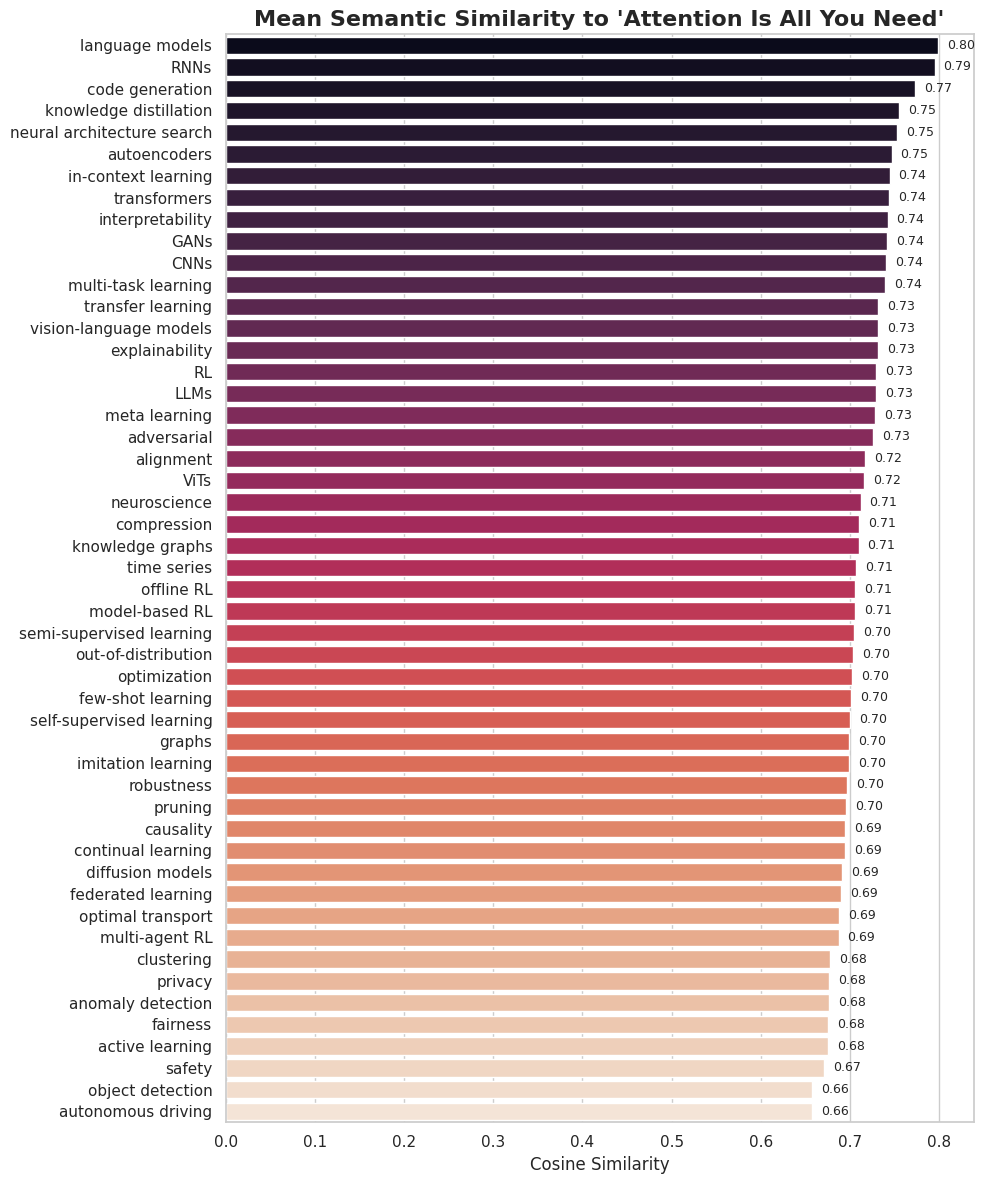

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tag_sim = df.explode("tags_semantic") \
            .groupby("tags_semantic")["sim_to_attention"] \
            .mean() \
            .sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.set(style="whitegrid")

palette = sns.color_palette("rocket", len(tag_sim))

ax = sns.barplot(
    x=tag_sim.values,
    y=tag_sim.index,
    palette=palette
)

plt.title("Mean Semantic Similarity to 'Attention Is All You Need'", fontsize=16, weight='bold')
plt.xlabel("Cosine Similarity", fontsize=12)
plt.ylabel("")

for i, (val, name) in enumerate(zip(tag_sim.values, tag_sim.index)):
    ax.text(val + 0.01, i, f"{val:.2f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()